# Preprocessing the Data (Version 2)


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the csv
rawDF = pd.read_csv('MLdataB1.csv')
rawDF.head()

,state,brand,spend,impressions,leads,link_clicks,reach,agency
0,TN,B1,8.96,492,0,0,483,Agency 4
1,OH,B1,31.64,1946,2,20,1859,Agency 2
2,GA,B1,15.92,797,0,3,773,Agency 4
3,FL,B1,32.46,2369,2,12,2153,Agency 3
4,NV,B1,16.14,1140,1,16,1079,Agency 2


In [2]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102829 entries, 0 to 102828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   state        102829 non-null  object 
 1   brand        102829 non-null  object 
 2   spend        102829 non-null  float64
 3   impressions  102829 non-null  int64  
 4   leads        102829 non-null  int64  
 5   link_clicks  102829 non-null  int64  
 6   reach        102829 non-null  int64  
 7   agency       102829 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 6.3+ MB


# Rough/Quick Preprocessing Complete

# Binning

In [3]:
# Determine the number of unique values in each column.
# if anything > 10, suggested to inspect further if non-numeric/string value column
rawDF.nunique()
# output shows potential need for binning on: 
# location_name, agency, date_start, campaign_id, state

state            40
brand             1
spend          7584
impressions    5402
leads            31
link_clicks     141
reach          4969
agency            8
dtype: int64

In [4]:
# Look at agency value counts for binning
agencyCnts = rawDF['agency'].value_counts()
agencyCnts

# It may be appropriate to EITHER: 
# 1. Bin Agencies 10-12 as "Other"
# OR 2. Focus on a couple of agencies against each other

Agency 4     42073
Agency 3     31589
Agency 2     14702
Agency 6     10846
Agency 7      2528
Agency 10      557
Agency 8       529
Agency 11        5
Name: agency, dtype: int64

<AxesSubplot:ylabel='Density'>

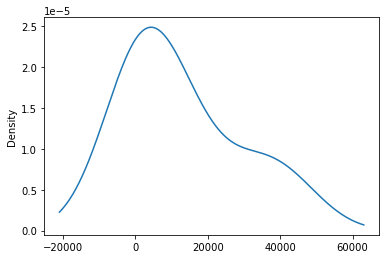

In [5]:
# Visualize the value counts of agencyCnts
agencyCnts.plot.density()

In [6]:
# groupby/left join agency
# value counts from agency

df = rawDF[['agency', 'impressions']]
df = df.groupby(by=['agency']).count()
df

,impressions
agency,
Agency 10,557
Agency 11,5
Agency 2,14702
Agency 3,31589
Agency 4,42073
Agency 6,10846
Agency 7,2528
Agency 8,529


In [7]:
# merge 
# use concat? 
### ISSUE: other columns not showing up
merge_df2 = pd.merge(rawDF, df, on=['agency'])
merge_df2

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,impressions_y
0,TN,B1,8.96,492,0,0,483,Agency 4,42073
1,GA,B1,15.92,797,0,3,773,Agency 4,42073
2,MO,B1,11.16,836,1,2,798,Agency 4,42073
3,RI,B1,8.80,759,0,2,729,Agency 4,42073
4,CA,B1,5.83,500,0,0,476,Agency 4,42073
...,...,...,...,...,...,...,...,...,...
102824,ME,B1,2.01,43,0,2,30,Agency 11,5
102825,ME,B1,1.38,31,0,0,24,Agency 11,5
102826,ME,B1,11.27,673,1,4,567,Agency 11,5
102827,ME,B1,11.34,800,0,2,691,Agency 11,5


In [8]:
# Determine which values to replace if counts are less than ...?

bins = [0, 500, 1000, 5000, 10000]
labels =['1', '2', '3', '4']


merge_df2['Agency Tiers'] = pd.cut(merge_df2['impressions_y'], bins,labels=labels)
print (merge_df2)


       state brand  spend  impressions_x  leads  link_clicks  reach  \
0         TN    B1   8.96            492      0            0    483   
1         GA    B1  15.92            797      0            3    773   
2         MO    B1  11.16            836      1            2    798   
3         RI    B1   8.80            759      0            2    729   
4         CA    B1   5.83            500      0            0    476   
...      ...   ...    ...            ...    ...          ...    ...   
102824    ME    B1   2.01             43      0            2     30   
102825    ME    B1   1.38             31      0            0     24   
102826    ME    B1  11.27            673      1            4    567   
102827    ME    B1  11.34            800      0            2    691   
102828    ME    B1   9.27            465      1            5    370   

           agency  impressions_y Agency Tiers  
0        Agency 4          42073          NaN  
1        Agency 4          42073          NaN  
2  

In [9]:
# drop impressions y
merge_df2.drop('impressions_y', axis=1, inplace=True)
merge_df2.head()

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,Agency Tiers
0,TN,B1,8.96,492,0,0,483,Agency 4,NaN
1,GA,B1,15.92,797,0,3,773,Agency 4,NaN
2,MO,B1,11.16,836,1,2,798,Agency 4,NaN
3,RI,B1,8.80,759,0,2,729,Agency 4,NaN
4,CA,B1,5.83,500,0,0,476,Agency 4,NaN


In [10]:
df3 = merge_df2.rename(columns={'impressions_x': 'Impressions'})
df3

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
0,TN,B1,8.96,492,0,0,483,Agency 4,NaN
1,GA,B1,15.92,797,0,3,773,Agency 4,NaN
2,MO,B1,11.16,836,1,2,798,Agency 4,NaN
3,RI,B1,8.80,759,0,2,729,Agency 4,NaN
4,CA,B1,5.83,500,0,0,476,Agency 4,NaN
...,...,...,...,...,...,...,...,...,...
102824,ME,B1,2.01,43,0,2,30,Agency 11,1
102825,ME,B1,1.38,31,0,0,24,Agency 11,1
102826,ME,B1,11.27,673,1,4,567,Agency 11,1
102827,ME,B1,11.34,800,0,2,691,Agency 11,1


In [11]:
df3.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
30349,TN,B1,8.52,696,0,1,664,Agency 4,NaN
88968,OH,B1,17.60,568,0,32,517,Agency 6,NaN
41412,CA,B1,8.25,368,0,1,356,Agency 4,NaN
91484,KY,B1,40.72,2644,0,34,2203,Agency 6,NaN
24582,NM,B1,14.81,1039,1,6,988,Agency 4,NaN
1672,NC,B1,17.58,820,0,2,780,Agency 4,NaN
62446,WA,B1,1.03,85,0,0,80,Agency 3,NaN
23978,CA,B1,15.00,958,1,9,918,Agency 4,NaN
8500,TN,B1,0.00,0,0,0,0,Agency 4,NaN
64784,IL,B1,0.00,0,0,0,0,Agency 3,NaN


In [12]:
# transform leads column from # of leads to binary, yes or no on a lead success 
# check non nulls
df3['leads'].notnull().astype('int')

0         1
1         1
2         1
3         1
4         1
         ..
102824    1
102825    1
102826    1
102827    1
102828    1
Name: leads, Length: 102829, dtype: int32

In [13]:
df3['leads'].isnull().astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
102824    0
102825    0
102826    0
102827    0
102828    0
Name: leads, Length: 102829, dtype: int32

In [14]:
# change nulls == 0
df3.leads.fillna(0,inplace=True)

In [15]:
# change non nulls == 1 
df3["leads"]=df3["leads"].apply(lambda x: 1 if x!=0 else 0)

In [16]:
df3['leads'].sample(10)

40722    1
44125    1
80731    0
77474    1
22111    0
14356    0
69297    0
22516    1
9322     0
58842    0
Name: leads, dtype: int64

In [17]:
df4=df3.dropna(subset=['leads'])

In [18]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
91697,OH,B1,3.06,107,0,0,103,Agency 6,NaN
86504,AZ,B1,26.99,962,0,3,913,Agency 3,NaN
20335,TN,B1,15.76,1518,0,4,1467,Agency 4,NaN
12519,TN,B1,11.34,662,0,1,652,Agency 4,NaN
47565,CA,B1,49.29,3321,1,11,3118,Agency 2,NaN
78474,OH,B1,1.67,123,1,2,121,Agency 3,NaN
36603,OH,B1,32.46,1732,0,10,1644,Agency 4,NaN
12390,ME,B1,0.00,0,0,0,0,Agency 4,NaN
1351,MO,B1,9.04,812,1,3,758,Agency 4,NaN
22598,RI,B1,11.67,833,1,5,741,Agency 4,NaN


### OptBinning for leads predict on bins for state

In [19]:
# use optbinning advanced binning
from optbinning import OptimalBinning as ob

In [20]:
variable = "leads"
x = df3['spend'].values
y = df3.leads

In [21]:
optb = ob(name=variable, dtype="numerical", solver="cp")

In [22]:
optb.fit(x, y)

OptimalBinning(name='leads')

In [23]:
binning_table = optb.binning_table

In [24]:
type(binning_table)

optbinning.binning.binning_statistics.BinningTable

In [25]:
binning_table.build()
### What does it mean: 
# Bin: the intervals delimited by the optimal split points.
# Count: the number of records for each bin.
# Count (%): the percentage of records for each bin.
# Non-event: the number of non-event records (y=0) for each bin.
# Event: the number of event records (y=1) for each bin.
# Event rate: the percentage of event records for each bin.
# WoE: the Weight-of-Evidence for each bin.
# IV: the Information Value (also known as Jeffrey’s divergence) for each bin.
# JS: the Jensen-Shannon divergence for each bin.

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.03)",17839,0.173482,17809,30,0.001682,6.162103,1.916078,1.058683e-01
1,"[2.03, 5.48)",5188,0.050453,4779,409,0.078836,2.234113,0.166806,1.737170e-02
2,"[5.48, 7.91)",5547,0.053944,4353,1194,0.215251,1.069397,0.053495,6.385395e-03
3,"[7.91, 10.43)",6468,0.062901,4288,2180,0.337044,0.452337,0.012348,1.530528e-03
4,"[10.43, 13.56)",8514,0.082798,5322,3192,0.374912,0.287043,0.006669,8.308270e-04
5,"[13.56, 15.89)",8124,0.079005,4524,3600,0.443131,0.004304,0.000001,1.828810e-07
6,"[15.89, 23.46)",14801,0.143938,7444,7357,0.497061,-0.212403,0.006547,8.168103e-04
7,"[23.46, 29.97)",7697,0.074852,2977,4720,0.613226,-0.685052,0.035108,4.304618e-03
8,"[29.97, 31.95)",5196,0.050530,1409,3787,0.728830,-1.212853,0.070657,8.327721e-03
9,"[31.95, 41.78)",11983,0.116533,2637,9346,0.779938,-1.489465,0.236044,2.704879e-02


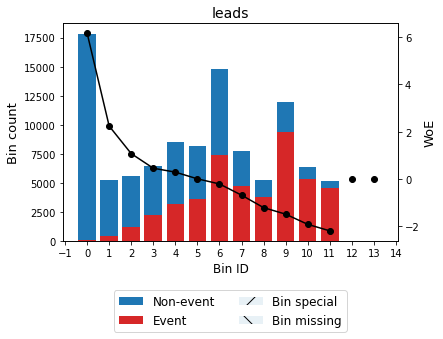

In [26]:
binning_table.plot(metric="woe")
# woe = inversely related to event rate, weight of evidence for each bin
# shows impression on y axis in thousands
# woe on right 
# bins on bottom 

### Binning check on all columns

In [27]:
# use scorecard advanced binning
# https://pypi.org/project/scorecardpy/
import scorecardpy as sc

In [28]:
bins = sc.woebin(df3, y="leads")

[INFO] creating woe binning ...


C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: brand)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [ ]:
# plot the bins
sc.woebin_plot(bins)
# need to reformat to read plots easily

### quick observation---Plots with highest IV value = most likley to predict successfully on leads
# state (.05), agency (.03), spend (.002) seem most promising

### Drop for split

In [29]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
23035,CT,B1,0.00,0,0,0,0,Agency 4,NaN
20853,GA,B1,23.19,1671,1,4,1499,Agency 4,NaN
92775,FL,B1,19.89,2464,0,37,2062,Agency 6,NaN
64822,AZ,B1,17.21,623,1,8,599,Agency 3,NaN
54940,AZ,B1,64.64,5210,1,19,4676,Agency 2,NaN
102741,GA,B1,26.41,993,0,4,863,Agency 10,2
85649,TN,B1,20.16,929,0,12,835,Agency 3,NaN
27770,NJ,B1,14.14,938,1,2,908,Agency 4,NaN
26059,MS,B1,15.08,1061,0,2,922,Agency 4,NaN
6438,PA,B1,0.00,0,0,0,0,Agency 4,NaN


In [30]:
# check current df and keep only: 
# state tiers, agency tiers, spend, Impressions, brand
# target = leads
model_df1 = df4.drop(columns=['agency', 'brand'])

In [31]:
model_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102829 entries, 0 to 102828
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   state         102829 non-null  object  
 1   spend         102829 non-null  float64 
 2   Impressions   102829 non-null  int64   
 3   leads         102829 non-null  int64   
 4   link_clicks   102829 non-null  int64   
 5   reach         102829 non-null  int64   
 6   Agency Tiers  3619 non-null    category
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 5.6+ MB


In [32]:
model_df1.to_csv('b1_df_nonEncoded.csv')

### Encoding

In [33]:
# generagte cat variables
# Generate our categorical variable lists
application_cat = model_df1.dtypes[model_df1.dtypes == "object"].index.tolist()

In [34]:
# one hot encoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# create new df before merging later
encoded_df = pd.DataFrame(enc.fit_transform(model_df1[application_cat]))

# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names(application_cat)
encoded_df.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_FL,state_GA,state_IA,state_ID,...,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# merge dfs
model_df1_official = model_df1.merge(encoded_df, left_index=True, right_index=True)
model_df1_official = model_df1.drop(application_cat, 1)
model_df1_official.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,spend,Impressions,leads,link_clicks,reach,Agency Tiers
0,8.96,492,0,0,483,NaN
1,15.92,797,0,3,773,NaN
2,11.16,836,1,2,798,NaN
3,8.80,759,0,2,729,NaN
4,5.83,500,0,0,476,NaN


In [36]:
model_df1_official.to_csv('b2_df.csv')